<a href="https://colab.research.google.com/github/GuiSamuka/IC-CoRoT_Kepler/blob/main/02_Analysing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quick data analysis using Pandas

In [67]:
import pandas as pd

In [68]:
FILE_PATH = '/content/drive/MyDrive/01 - Iniciação Científica/02 - Datasets/csv_files/EN2_STAR_CHR_0102890318_20070206T133547_20070402T070302.csv'

We confirm that we are only working with DATABARRT and WHITEFLUXSYS columns

In [69]:
df = pd.read_csv(FILE_PATH)
df.head()

,DATEBARTT,WHITEFLUXSYS
0,54138.073885,219929.30
1,54138.079811,220816.39
2,54138.085737,220129.64
3,54138.091662,219876.34
4,54138.097588,219744.33


In this case, there are 9229 rows and 2 columns

In [70]:
(row, columns) = df.shape
print(row, columns)

9228 2


Both columns do not have NaN values and they have *float64* Dtype

In [71]:
df.isnull().values.any()

False

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9228 entries, 0 to 9227
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATEBARTT     9228 non-null   float64
 1   WHITEFLUXSYS  9228 non-null   float64
dtypes: float64(2)
memory usage: 144.3 KB


Statistical summary of data

In [73]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DATEBARTT,9228.0,54165.432390,15.799036,54138.073885,54151.752043,54165.435551,54179.114102,54192.791466
WHITEFLUXSYS,9228.0,221509.549025,1222.856566,214899.080000,221382.510000,221585.635000,221933.035000,224749.330000


### Before results

In [74]:
import plotly.express as px

fig = px.line(df, x='DATEBARTT', y='WHITEFLUXSYS', title='Light Curve')
fig.show()

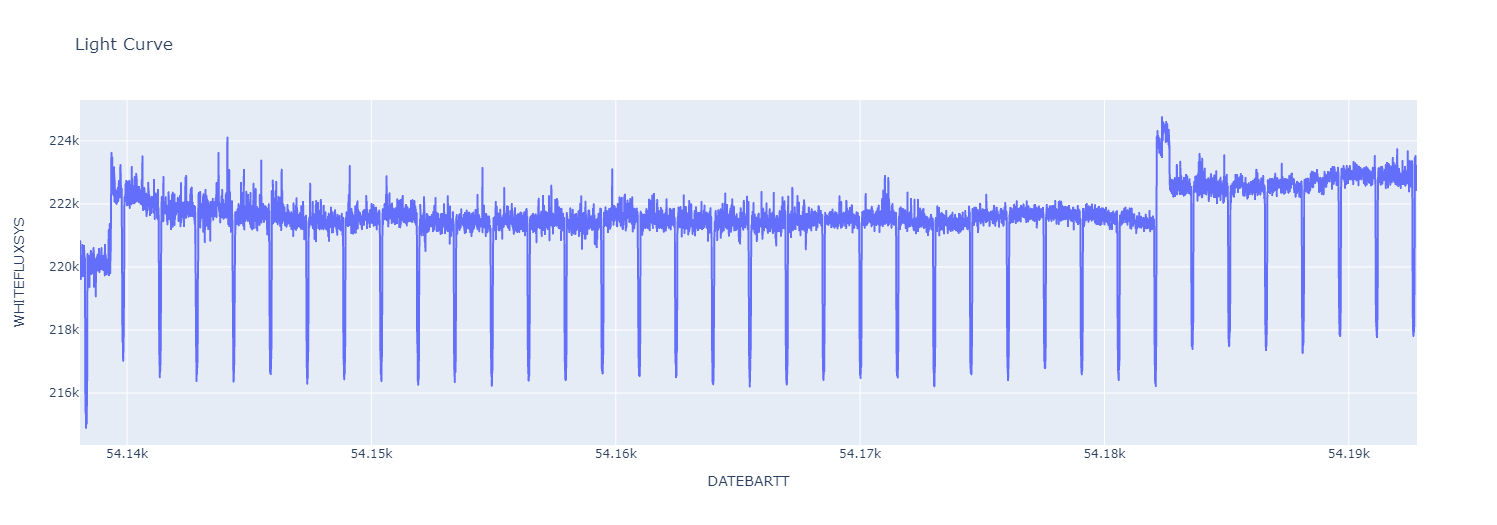

# Transforming into an array

In [75]:
df.head()

,DATEBARTT,WHITEFLUXSYS
0,54138.073885,219929.30
1,54138.079811,220816.39
2,54138.085737,220129.64
3,54138.091662,219876.34
4,54138.097588,219744.33


In [76]:
import numpy as np

In [77]:
y = df.WHITEFLUXSYS.to_numpy()

In [78]:
date = df.DATEBARTT.to_numpy()

In [79]:
# df.drop('DATEBARTT', axis=1)

In [80]:
import pprint as pp

pp.pprint(y)
print('')
pp.pprint(date)

array([219929.3 , 220816.39, 220129.64, ..., 222813.8 , 223179.67,
       222808.1 ])

array([54138.07388529, 54138.07981095, 54138.08573661, ...,
       54192.77961555, 54192.78554097, 54192.79146639])


In [81]:
fig = px.line(x=date, y=y, title='Light Curve with Artificial Borders')
fig.show()

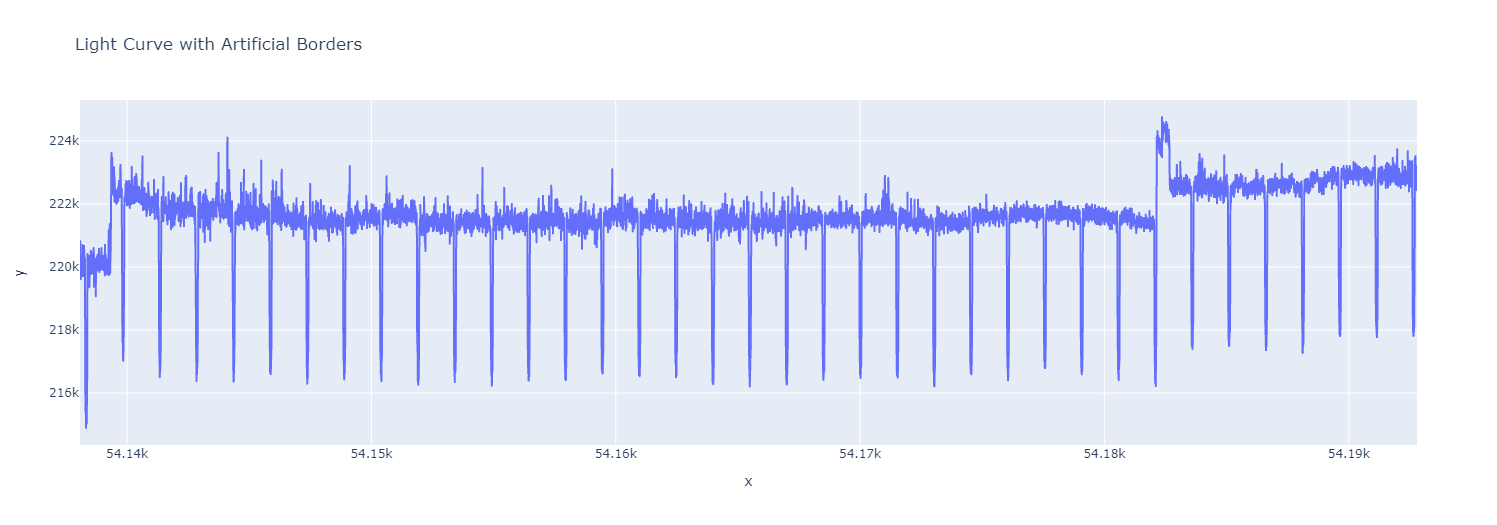

# Artificial borders*

In [82]:
def artificial_borders(array, num):
  aux_pre = np.zeros(num)
  aux_pos = np.zeros(num)
  i = 0
  for i in range(num):
    aux_pre[i] = array[0]
    aux_pos[i] = array[-1]
  
  return np.concatenate((aux_pre, array, aux_pos)).ravel()

In [83]:
whiteflux_artificial_borders = artificial_borders(y, 15)
pp.pprint(whiteflux_artificial_borders)

array([219929.3, 219929.3, 219929.3, ..., 222808.1, 222808.1, 222808.1])


In [84]:
datebartt_artificial_borders = artificial_borders(date, 15)
pp.pprint(datebartt_artificial_borders)

array([54138.07388529, 54138.07388529, 54138.07388529, ...,
       54192.79146639, 54192.79146639, 54192.79146639])


In [85]:
fig = px.line(x=datebartt_artificial_borders, y=whiteflux_artificial_borders, title='Light Curve with Artificial Borders')
fig.show()

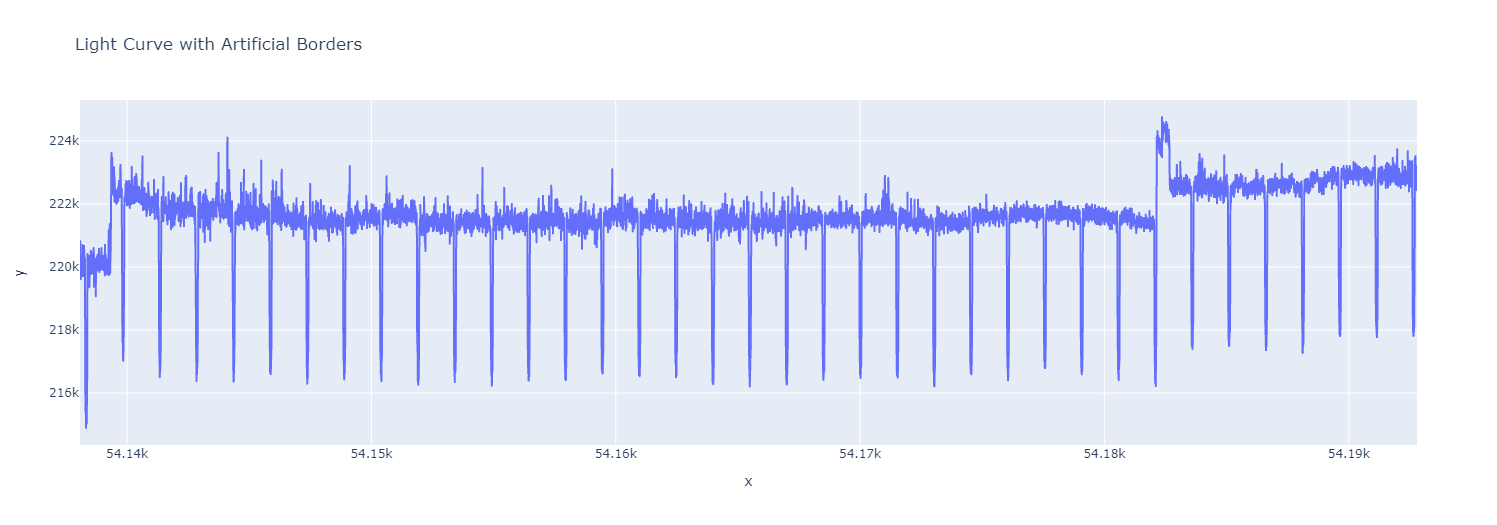

# Multiplicar a curva de luz por -1^(i)

In [86]:
def multiplying_by_minus_one_to_index(array):
  i = 0
  new_array = np.ones(len(array))

  for i in range(len(array)):
    new_array[i] = array[i] * ( (-1)**(i) )
  
  return new_array

In [87]:
whiteflux_multiplied = multiplying_by_minus_one_to_index(whiteflux_artificial_borders)
pp.pprint(whiteflux_multiplied)

array([ 219929.3, -219929.3,  219929.3, ..., -222808.1,  222808.1,
       -222808.1])


In [88]:
datebartt_multiplied = datebartt_artificial_borders

In [89]:
fig = px.scatter(x=datebartt_multiplied, y=whiteflux_multiplied, title='Light Curve Multiplied')
fig.show()

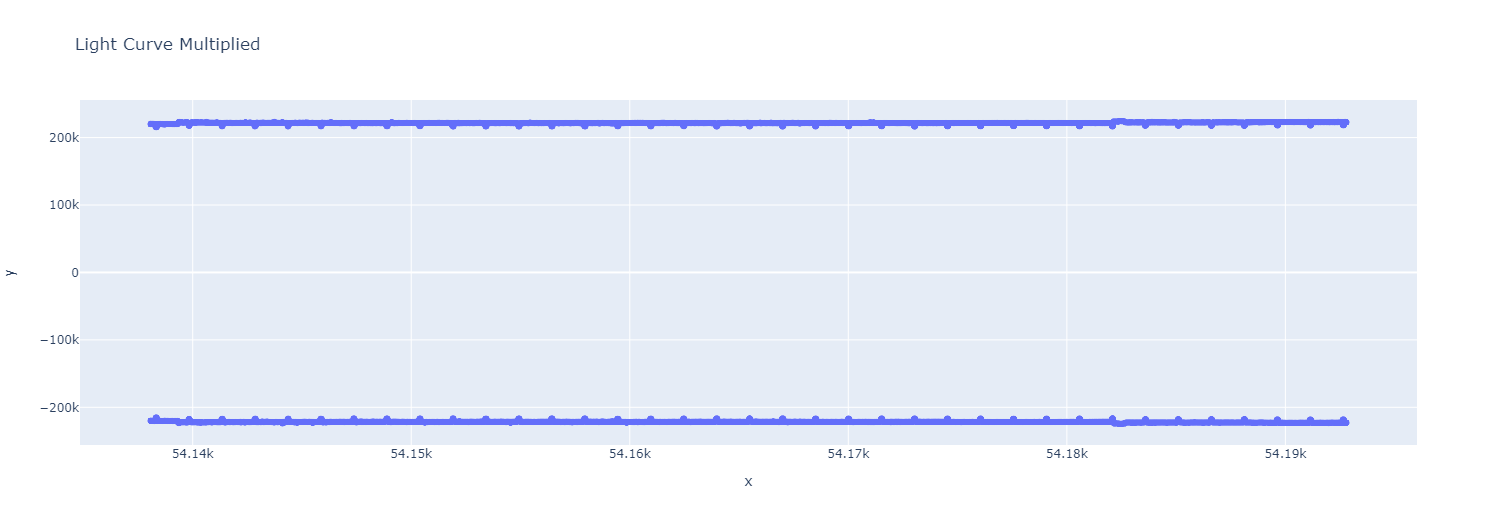

# Padding

In [90]:
def padding(array):
  return np.append(array, np.zeros(len(array)))

In [91]:
whiteflux_padding = padding(whiteflux_multiplied)
print(len(whiteflux_padding))

18516


In [92]:
datebartt_padding = padding(datebartt_multiplied)
print(len(datebartt_padding))

18516


In [93]:
fig = px.scatter(x=datebartt_padding, y=whiteflux_padding, title='Light Curve Padded')
fig.show()

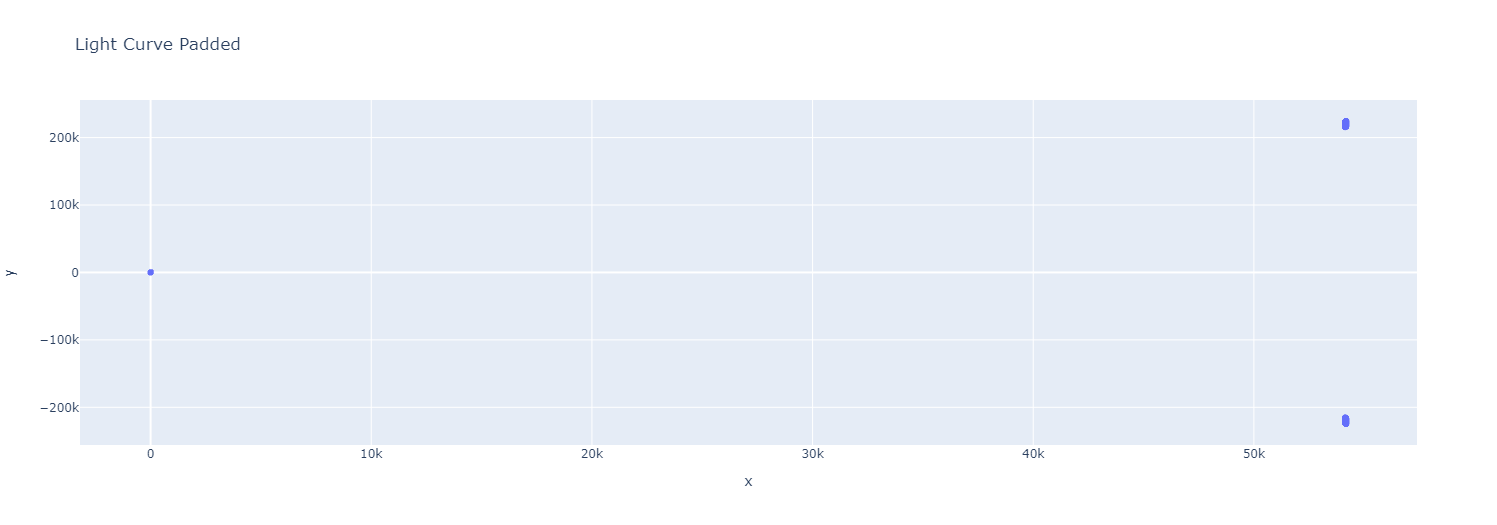

# Butterworth filter


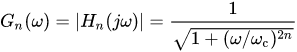

where:

- G is the gain of an n-order Butterworth low-pass filter
- H is transfer funcion
- j is imaginary number
- n is the order of the filter
- ω  is the angular frequency in radians per second,
- ${\displaystyle \omega _{\mathrm {c} }}{\displaystyle \omega _{\mathrm {c} }}$ is the cutoff frequency.

In [98]:
from scipy.signal import butter, sosfilt, sosfreqz

[Stackoverflow](https://stackoverflow.com/questions/12093594/how-to-implement-band-pass-butterworth-filter-with-scipy-signal-butter)

[Documentação](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html)


In [95]:
def butter_bandpass(lowcut, highcut, fs, order=5):
  nyq = 0.5 * fs
  low = lowcut / nyq
  high = highcut / nyq
  sos = butter(order, [low, high], analog=False, btype='band', output='sos')
  return sos


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
  sos = butter_bandpass(lowcut, highcut, fs, order=order)
  y = lfilter(b, a, data)
  return y

In [119]:
# Sample rate and desired cutoff frequencies (in Hz).

fs = 5000.0
lowcut = 500.0
highcut = 1250.0

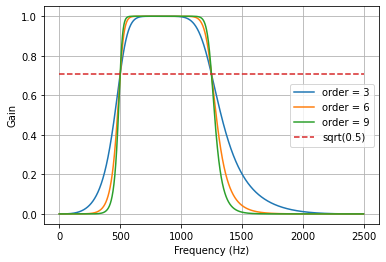

In [136]:
# Plot the frequency response for a few different orders.

plt.figure(1)
plt.clf()

for order in [3, 6, 9]:
  sos = butter_bandpass(lowcut, highcut, fs, order=order)
  w, h = sosfreqz(sos, worN=2000) 
  plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)], '--', label='sqrt(0.5)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

plt.show()

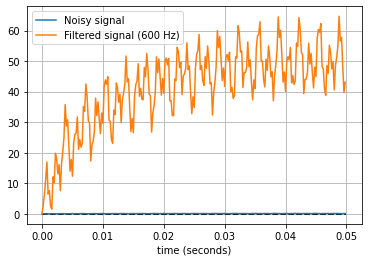

In [215]:
# Filter a noisy signal.

T = 0.05
nsamples = T * fs
t = np.linspace(0, T, int(nsamples), endpoint=False)
a = 0.02
f0 = 600.0

x = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
x += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
x += a * np.cos(2 * np.pi * f0 * t + .11)
x += 0.03 * np.cos(2 * np.pi * 2000 * t)

plt.figure(2)
plt.clf()
plt.plot(t, x, label='Noisy signal')

y = butter_bandpass_filter(x, lowcut, highcut, fs, order=6)

plt.plot(t, y, label='Filtered signal (%g Hz)' % f0)
plt.xlabel('time (seconds)')
plt.hlines([-a, a], 0, T, linestyles='--')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.show()

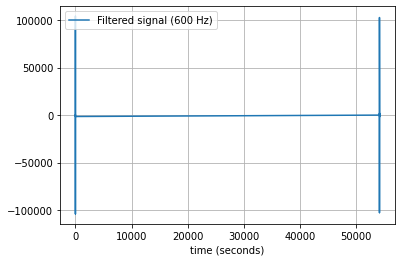

In [145]:
# Filter a light curve signal.

T = 0.05
nsamples = T * fs
t = datebartt_padding
a = 0.02
f0 = 600.0

x = whiteflux_padding

plt.figure(3)
plt.clf()
#plt.scatter(t, x, label='Noisy signal')

y = butter_bandpass_filter(x, lowcut, highcut, fs, order = 6)

plt.plot(t, y, label='Filtered signal (%g Hz)' % f0)
plt.xlabel('time (seconds)')
plt.hlines([-a, a], 0, T, linestyles='--')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.show()

In [167]:
aux_y = y

In [173]:
len(aux_y)

18516

In [171]:
y1 = aux_y[:int(len(aux_y)/2)]

In [172]:
len(y1)

9258

In [178]:
y2 = multiplying_by_minus_one_to_index(y1)

In [216]:
fig = px.line(x=datebartt_artificial_borders, y=y2)
fig.show()

In [180]:
aux_y2 = y2

In [185]:
len(y2)

9258

In [207]:
y3 = np.delete(aux_y2, np.s_[:16])

In [208]:
len(y3)

9242

In [218]:
y4 = np.delete(y3, np.s_[-16:])

In [219]:
len(y4)

9226

In [220]:
new_date = np.delete(date, [0,1])

In [221]:
fig = px.line(x=new_date, y=y4, title='Filtrado')
fig.show()

# Transformada de Fourier

In [ ]:
# whiteflux_fft = np.real(np.fft.fft(whiteflux_padding))

whiteflux_fft = np.fft.fft(whiteflux_padding)

pp.pprint(whiteflux_fft)

array([-1.92555400e+04-3.59432306e-09j,  2.16276389e+05+1.20816656e+04j,
       -1.93407988e+02+4.74992761e+03j, ...,
        2.30470088e+05-4.05994950e+03j, -1.93407988e+02-4.74992761e+03j,
        2.16276389e+05-1.20816656e+04j])


### Removendo o valor maximo



In [ ]:
np.max(whiteflux_fft)

(2050731179.3999996-4.432240530150011e-08j)

In [ ]:
i = np.where(whiteflux_fft == np.max(whiteflux_fft))

whiteflux_fft_new = np.delete(whiteflux_fft, i)

In [ ]:
np.max(whiteflux_fft_new)

(2151401.5991494386+977891.9707136351j)

### Plotando apenas a parte real

In [ ]:
t = np.arange(len(whiteflux_fft_new))
pp.pprint(t)

array([    0,     1,     2, ..., 18512, 18513, 18514])


In [ ]:
len(np.real(whiteflux_fft))

18516

In [ ]:
fig = px.line(x=t, y=np.real(whiteflux_fft_new), title='FFT')
fig.show()

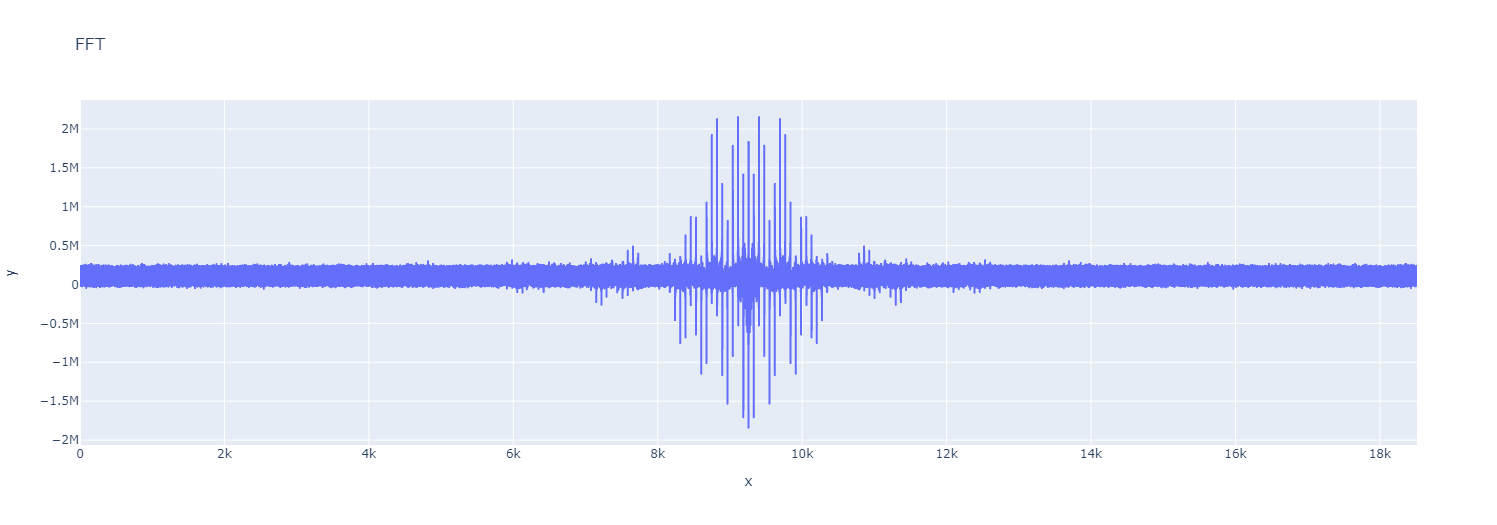